#**1. Introduction**#

Natural Language Processing (NLP) is a field focused on enabling machines to understand, interpret, and respond to human language. A crucial part of this process is text preprocessing, which prepares raw text for machine learning algorithms. Tokenization and text cleaning are the foundational steps of preprocessing.

**2. Why Text Preprocessing Matters**

*Raw text is messy:* It includes variations in casing, punctuation, and inconsistent formatting.

*Machine learning models require clean input:* Text must be converted into a structured format that models can process.

Better preprocessing = Better model performance.



**3. Key Preprocessing Steps**

a. Lowercasing - Makes text uniform.

b. Removing Punctuation - Removes irrelevant characters.

c. Removing Stopwords - Eliminates common words like "and", "the", etc.

d. Lemmatization/Stemming - Reduces words to their root forms.

e. Tokenization - Splits text into individual components.

**Pre-requisite**


*   Basic programming preferably python where participantubderstand and are familiar with variables, loops, fuctions, and conditionals, data structure, and experience using pandas, numpy, and matplotlib
*   Basic Mathematics such as probability, statistics, etc
*   Tools & Libraries like jupyter notebook, NLTK/spaCy,and matplotlib
*   Be comfortable with strings in Python
*   Know how to clean and split text (e.g., remove punctuation, lowercase words)



In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Download the necessary NLTK data packages
nltk.download('punkt_tab')
nltk.download('stopwords') # Download the stopwords dataset

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Sample Text
text = """
Natural Language Processing (NLP) is a fascinating field of Artificial Intelligence that enables computers to understand, interpret, and generate human language.
NLP combines computational linguistics with machine learning and deep learning models.
"""
print("=== Raw Text ===")
print(text)
print(f"\nWord Count (Raw): {len(text.split())}")

=== Raw Text ===

Natural Language Processing (NLP) is a fascinating field of Artificial Intelligence that enables computers to understand, interpret, and generate human language.
NLP combines computational linguistics with machine learning and deep learning models.


Word Count (Raw): 32


**4. What is Tokenization?**

Tokenization is the process of breaking down text into smaller units called tokens. These tokens can be words, subwords, sentences, or characters.

**5. Types of Tokenizers**

Word Tokenizer: Splits text into words.

Sentence Tokenizer: Splits text into sentences.

Subword Tokenizer: Breaks words into parts (e.g., BERT).

Character Tokenizer: Each character is treated as a token.

*In this tutorial, we will consider word and sentence tokenizer.*

**6. Tokenization Libraries***

NLTK:* Traditional NLP library with basic tokenizers.

*spaCy:* Fast, efficient tokenizer with built-in lemmatization.

In [ ]:
# Tokenization
tokens = word_tokenize(text)

print("\n=== Tokenized Text ===")
print(tokens)
print(f"\nToken Count: {len(tokens)}")


=== Tokenized Text ===
['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', 'field', 'of', 'Artificial', 'Intelligence', 'that', 'enables', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', '.', 'NLP', 'combines', 'computational', 'linguistics', 'with', 'machine', 'learning', 'and', 'deep', 'learning', 'models', '.']

Token Count: 38


**7. Stopword Removal**

Stopwords are common words that typically do not contribute significant meaning to a sentence and can be safely removed during preprocessing.

Examples of stopwords: "the", "is", "in", "and", "to", "a"

**Why remove them?**

They add noise and inflate dimensionality in vector space.

They rarely contribute to the meaning relevant to text classification or information retrieval.

*Note: Always consider the context of your task. In sentiment analysis, words like "not" might be essential even though they are often stopwords.*

In [ ]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

print("\n=== After Stopword Removal ===")
print(tokens_no_stopwords)
print(f"\nWord Count (No Stopwords): {len(tokens_no_stopwords)}")


=== After Stopword Removal ===
['Natural', 'Language', 'Processing', 'NLP', 'fascinating', 'field', 'Artificial', 'Intelligence', 'enables', 'computers', 'understand', 'interpret', 'generate', 'human', 'language', 'NLP', 'combines', 'computational', 'linguistics', 'machine', 'learning', 'deep', 'learning', 'models']

Word Count (No Stopwords): 24


**8. Stemming vs. Lemmatization**

*Stemming:* Cuts words to base form (e.g., "running" → "run"). Crude but fast.

*Lemmatization:* Uses vocabulary and morphology to find the base word (e.g., "better" → "good"). More accurate.

Tools: NLTK, spaCy

In [ ]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens_no_stopwords]

print("\n=== After Stemming ===")
print(stemmed_tokens)


=== After Stemming ===
['natur', 'languag', 'process', 'nlp', 'fascin', 'field', 'artifici', 'intellig', 'enabl', 'comput', 'understand', 'interpret', 'gener', 'human', 'languag', 'nlp', 'combin', 'comput', 'linguist', 'machin', 'learn', 'deep', 'learn', 'model']


In [ ]:
# Lemmatization using spaCy
doc = nlp(' '.join(tokens_no_stopwords))
lemmatized_tokens = [token.lemma_ for token in doc]

print("\n=== After Lemmatization ===")
print(lemmatized_tokens)


=== After Lemmatization ===
['Natural', 'Language', 'Processing', 'NLP', 'fascinating', 'field', 'Artificial', 'Intelligence', 'enable', 'computer', 'understand', 'interpret', 'generate', 'human', 'language', 'NLP', 'combine', 'computational', 'linguistic', 'machine', 'learn', 'deep', 'learning', 'model']


**9. Word Cloud Visualization**

Word clouds provide a visual representation of the most frequent words in a body of text. Words that appear more frequently are shown in larger fonts. They are useful for quickly identifying dominant terms.

**Use Cases:**

*   Visual exploratory analysis
*   Presenting frequent terms
*   Identifying keywords

*Tip: Ensure preprocessing is done (stopword removal, lemmatization) before generating the word cloud.*

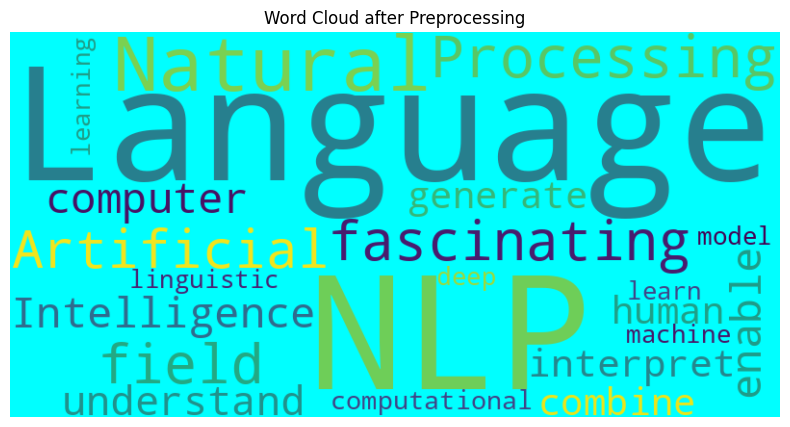

In [ ]:
# Generate Word Cloud
text_for_wordcloud = ' '.join(lemmatized_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='cyan').generate(text_for_wordcloud)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud after Preprocessing')
plt.show()

**Troubleshooting**


1.   Skipping Preprocessing
2.   Removing Important Words : removing all stopwords can sometimes delete useful words like **"not"** which can flip the meaning in sentiment analysis.
3.   Overlooking the domain-specific  language.



**Discussions and questions section**